**The goal of this project is to build a linear regression model to predict house prices in the Ames housing dataset. The dataset includes various features about residential properties in Ames, Iowa, such as lot size, building type, and house quality. The focus is on pre-processing the data, handling missing values, encoding categorical features, and building a predictive model using linear regression.**

In [ ]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#Import necessary libraries including pandas, os, train_test_split, LinearRegression, ColumnTransformer, OneHotEncoder, SimpleImputer, mean_squared_error, and StandardScal

In [ ]:
import sklearn
import matplotlib
import pandas as pd
import os
import scipy.stats as stats

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
# Specify the path to the directory containing the dataset
dataset_path = r'C:\Users\HP\Downloads\Compressed\houseprices'

In [ ]:
# List the files in the directory to verify their exact names
print("Directory Contents:", os.listdir(dataset_path))

Directory Contents: ['data_description.txt', 'sample_submission.csv', 'test (1).csv', 'train (1).csv']


In [ ]:
# Load the training and test datasets using pd.read_csv(
train_data = pd.read_csv(r'C:\Users\HP\Downloads\Compressed\houseprices\train (1).csv')
test_data = pd.read_csv(r'C:\Users\HP\Downloads\Compressed\houseprices\test (1).csv')


In [ ]:
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (1460, 81)
Test Data Shape: (1459, 80)


In [ ]:
# Display the first few rows of each dataset to understand their structure
print("\nFirst few rows of Train Data:")
print(train_data.head())

print("\nFirst few rows of Test Data:")
print(test_data.head())


First few rows of Train Data:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sa

In [ ]:
# Generate summary statistics for numerical columns in train_data
print("\nSummary Statistics for Train Data:")
print(train_data.describe())


Summary Statistics for Train Data:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.

In [ ]:
# Check for missing values in train_data and test_data
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Train Data:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Missing Values in Test Data:
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [ ]:
# Separate the features (X_train) and the target variable (y_train) from the training dataset (train_data).
X_train = train_data.drop(columns=['SalePrice'])
y_train = train_data['SalePrice']

In [ ]:
# Identify columns with categorical data (categorical_cols).
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Preprocessing pipeline
#Set up a ColumnTransformer for preprocessing:
#Use SimpleImputer with strategy='mean' for numerical columns.
 #Use OneHotEncoder with handle_unknown='ignore' for categorical columns.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X_train.select_dtypes(include=['number']).columns.tolist()),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)


In [ ]:
# Fit and transform on X_train
#Fit the preprocessor on X_train and transform it to obtain X_train_prep.
X_train_prep = preprocessor.fit_transform(X_train)

In [ ]:
# Split into train and validation sets
#Split X_train_prep and y_train into training (X_train_final, y_train_final) and validation (X_val_final, y_val_final) sets using train_test_split().
X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_train_prep, y_train, test_size=0.2, random_state=42)

In [ ]:
# Model initialization and training
#Initialize a LinearRegression model, fit it on X_train_final and y_train_final.
model = LinearRegression()
model.fit(X_train_final, y_train_final)

LinearRegression()

In [ ]:
# Preprocess test data
#Transform the test dataset (test_data) using the preprocessor.
X_test_prep = preprocessor.transform(test_data)

In [ ]:
# Predictions
#Predict SalePrice for the test dataset using the trained model (y_pred).
y_pred = model.predict(X_test_prep)

In [ ]:
#evaluate the model
# Optionally, calculate the Mean Squared Error (mse) on the validation set (X_val_final, y_val_final) to evaluate the model's performance.
y_val_pred = model.predict(X_val_final)
mse = mean_squared_error(y_val_final, y_val_pred)
print("Mean Squared Error:", mse)
print(test_data.columns)

Mean Squared Error: 964235611.6216556
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQ

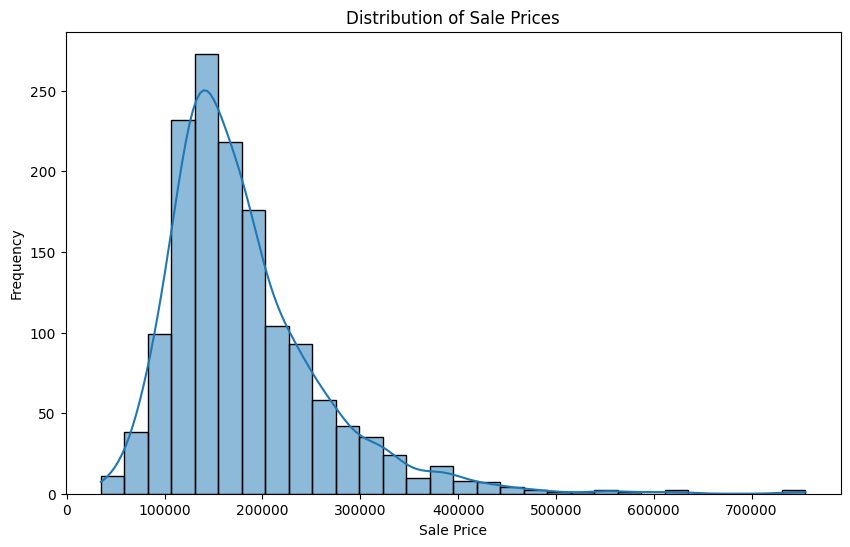

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of SalePrice
#helps you understand their distribution.
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


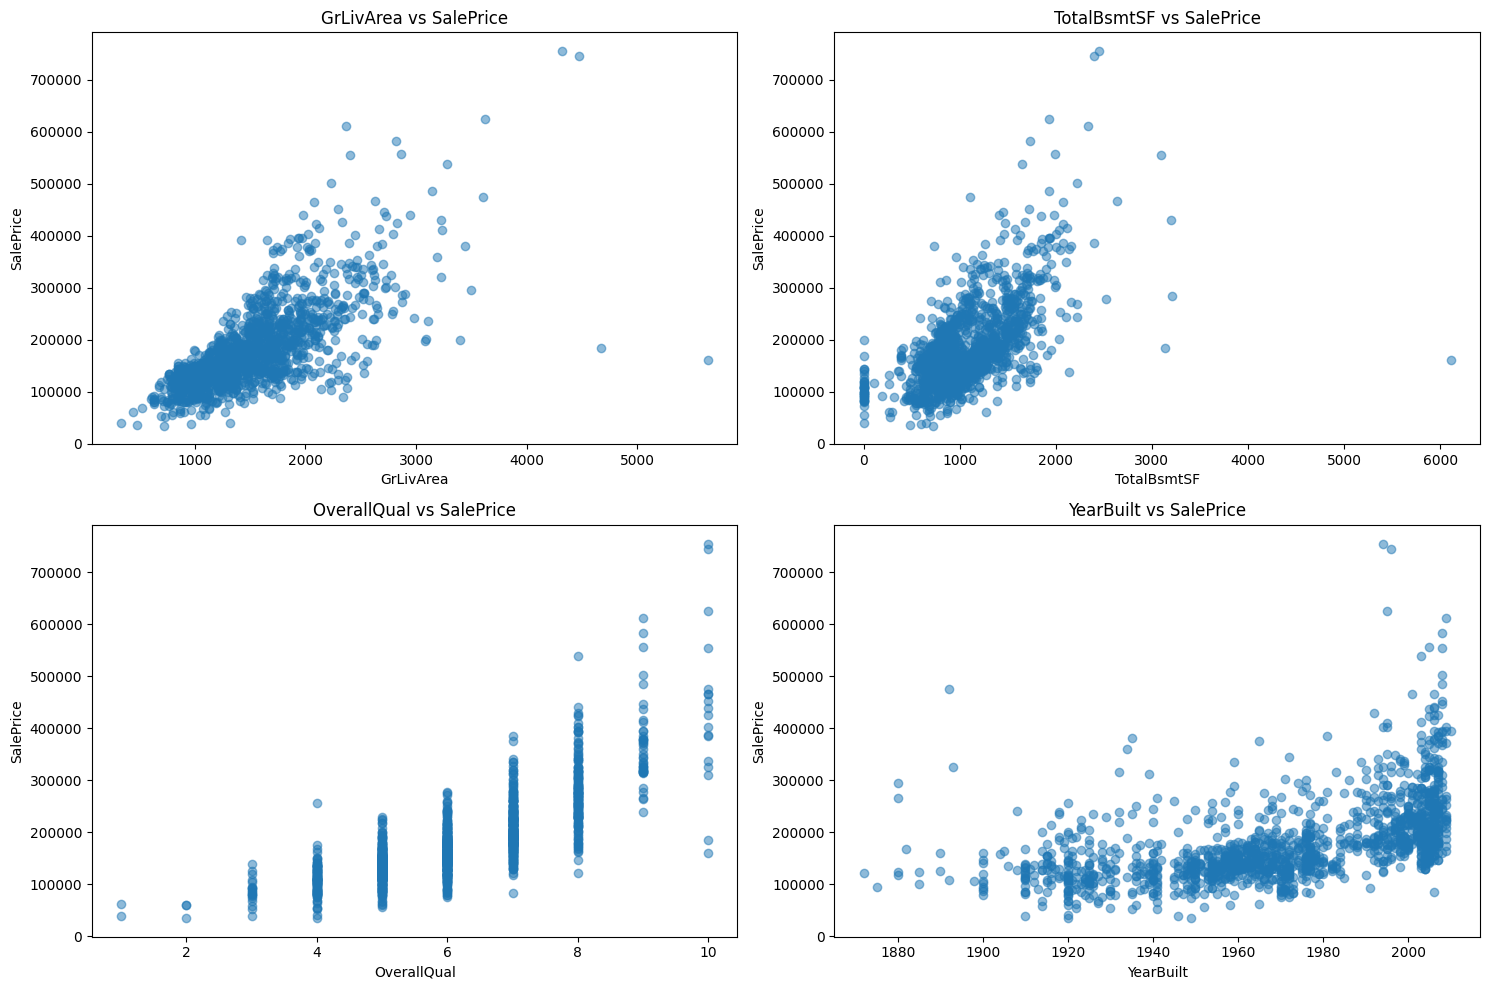

In [ ]:
# Scatter plot for a few important features against SalePrice
#helps you see how close the predicted values are to the actual values.
features = ['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'YearBuilt']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(train_data[feature], train_data['SalePrice'], alpha=0.5)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


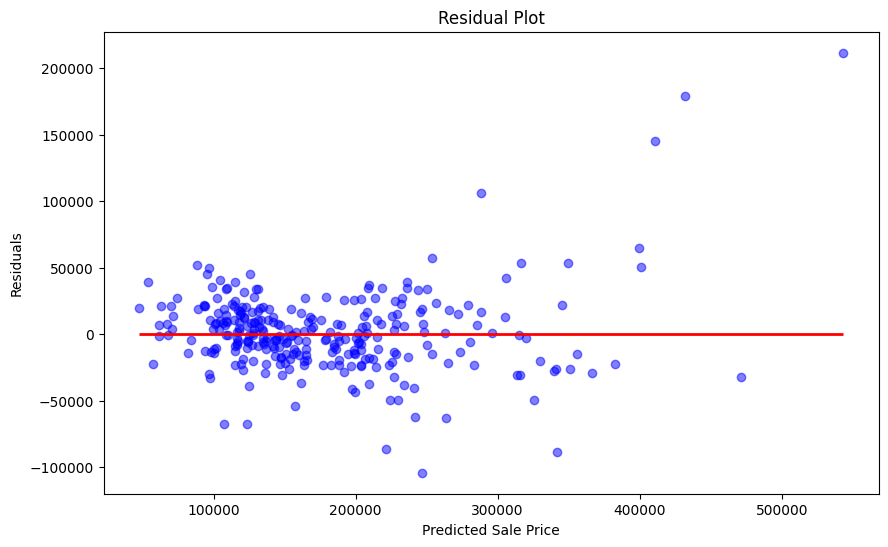

In [ ]:
# Residual plot- to  see the distribution of residuals (errors) and check for any patterns.
residuals = y_val_final - y_val_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred, residuals, alpha=0.5, color='b')
plt.hlines(y=0, xmin=min(y_val_pred), xmax=max(y_val_pred), color='red', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.show()

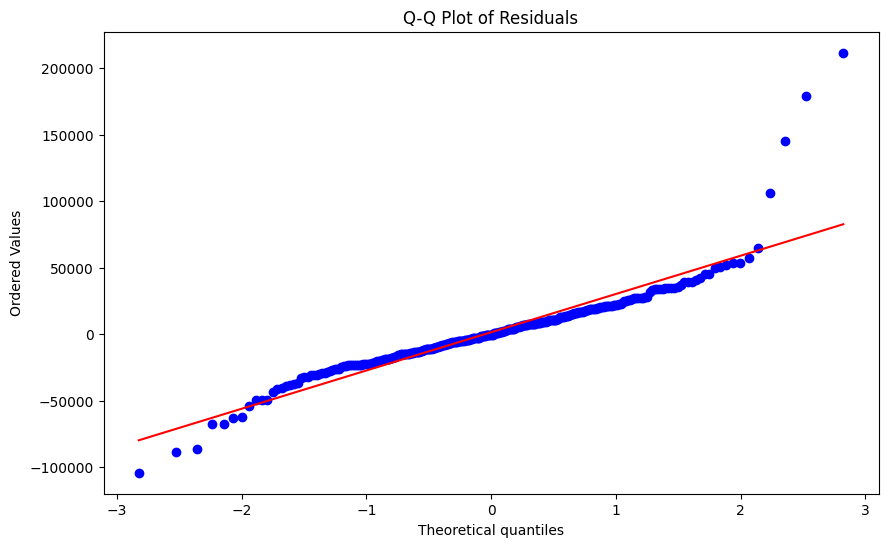

In [ ]:
# Q-Q plot helps to check if the residuals are normally distributed.
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
#Create data dictionary to document the structure of the dataset, including the features and any transformations applied.

| Column Name      | Description                                    |
|------------------|------------------------------------------------|
| Id               | Unique identifier for each house               |
| MSSubClass       | Identifies the type of dwelling involved       |
| MSZoning         | Identifies the general zoning classification   |
| LotFrontage      | Linear feet of street connected to property    |
| ...              | ...                                            |
| SalePrice        | The target variable, the sale price of houses  |
